In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('transferencias.csv')

In [3]:
# Verificando as 5 primeiras linhas
df.head()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploração inicial

#### Abaixo vemos que não há valores nulos em nenhuma das colunas, o conjunto de dados está completo e não há necessidade de tratamento de valores ausentes.

In [4]:
# Informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        284807 non-null  float64
 1   pais             284807 non-null  float64
 2   cidade           284807 non-null  float64
 3   bairro           284807 non-null  float64
 4   cep              284807 non-null  float64
 5   ip               284807 non-null  float64
 6   dia              284807 non-null  float64
 7   hora             284807 non-null  float64
 8   minuto           284807 non-null  float64
 9   so               284807 non-null  float64
 10  valor            284807 non-null  float64
 11  antecedentes     284807 non-null  float64
 12  reclamacoes      284807 non-null  float64
 13  qtd_trans        284807 non-null  float64
 14  crt              284807 non-null  float64
 15  limite_global    284807 non-null  float64
 16  tipo_crt         284807 non-null  floa

In [5]:
# Estatísticas descritivas
df.describe()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Verificação de dados ausentes
df.isnull().sum()

Timestamp          0
pais               0
cidade             0
bairro             0
cep                0
ip                 0
dia                0
hora               0
minuto             0
so                 0
valor              0
antecedentes       0
reclamacoes        0
qtd_trans          0
crt                0
limite_global      0
tipo_crt           0
estabelecimento    0
contas             0
emprestimos        0
navegador          0
android            0
ios                0
compras            0
hist_navegacao     0
relacionamento     0
ind_seguranca      0
tempo_transacao    0
lim_crt            0
hist_saldo         0
Target             0
dtype: int64

## Visualização de Dados

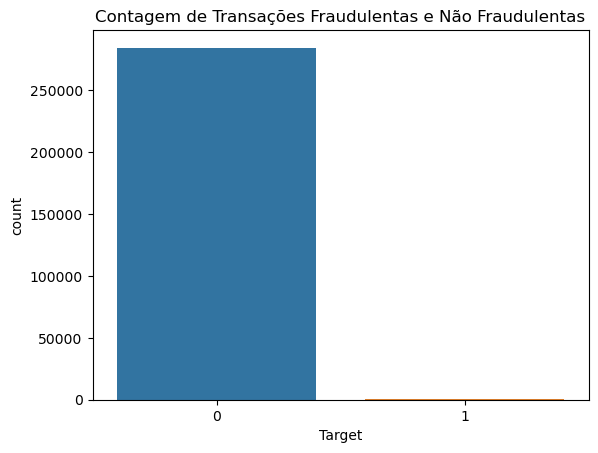

In [7]:
# Contagem de transações fraudulentas e não fraudulentas
sns.countplot(x='Target', data=df)
plt.title('Contagem de Transações Fraudulentas e Não Fraudulentas')
plt.show()

###### Acima vemos como nossos dados estão estão desbalanceados

In [8]:
# Verificando a correlação
df.corr()["Target"].sort_values(ascending=False)

Target             1.000000
antecedentes       0.154876
cep                0.133447
cidade             0.091289
android            0.040413
emprestimos        0.034783
navegador          0.020090
minuto             0.019875
tempo_transacao    0.017580
lim_crt            0.009536
hist_saldo         0.005632
ind_seguranca      0.004455
relacionamento     0.003308
ios                0.000805
compras           -0.002685
limite_global     -0.004223
qtd_trans         -0.004570
hist_navegacao    -0.007221
Timestamp         -0.012323
dia               -0.043643
ip                -0.094974
so                -0.097733
pais              -0.101347
contas            -0.111485
hora              -0.187257
bairro            -0.192961
tipo_crt          -0.196539
valor             -0.216883
reclamacoes       -0.260593
crt               -0.302544
estabelecimento   -0.326481
Name: Target, dtype: float64

<Axes: >

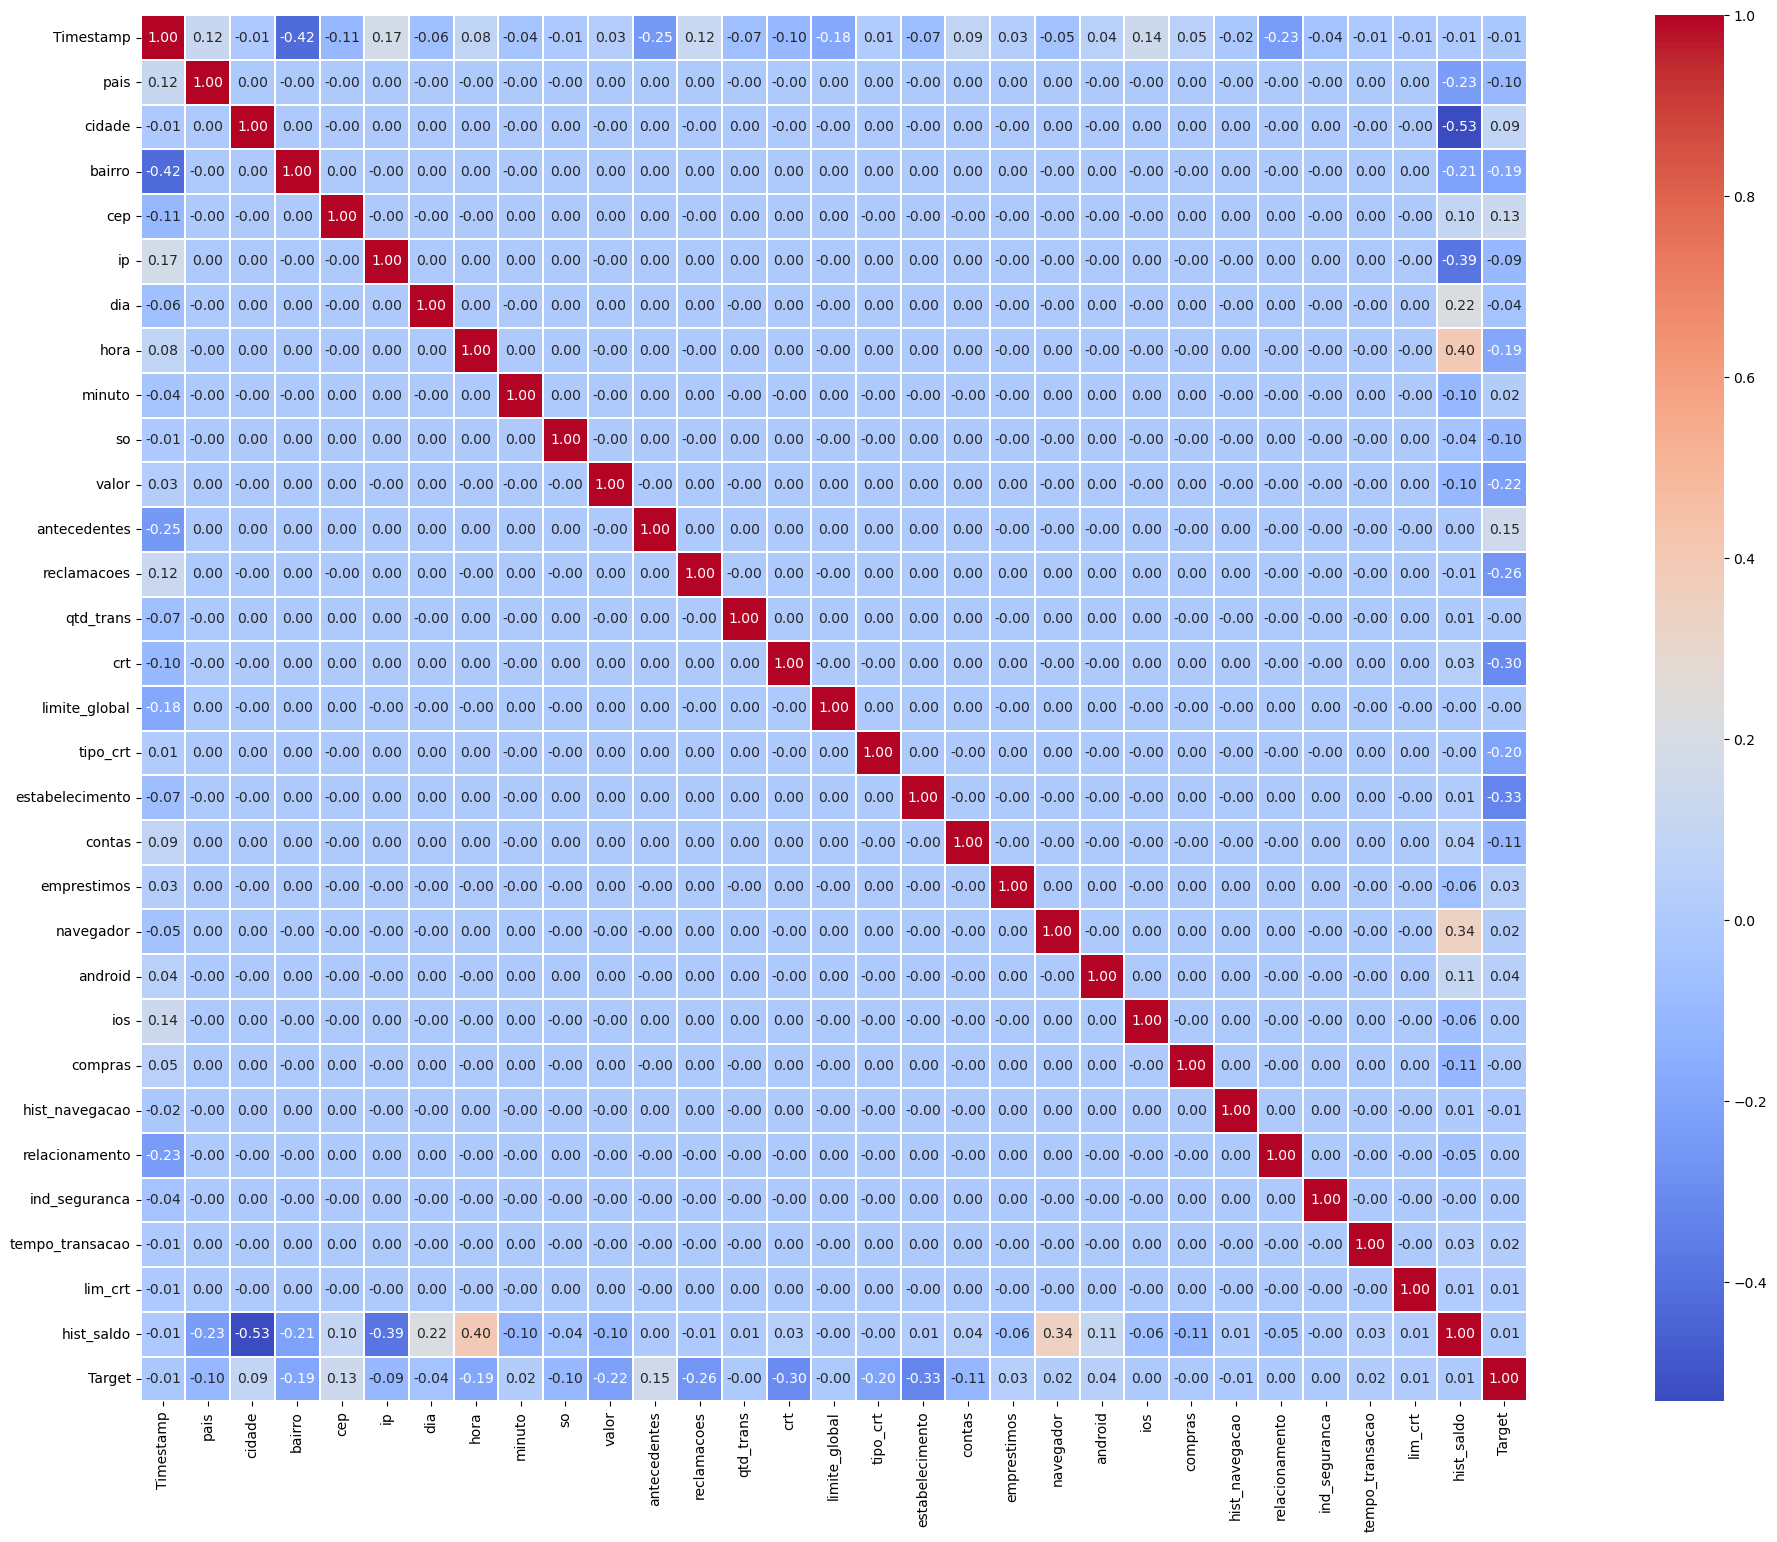

In [9]:
#df.corr(method="spearman")
fig,ax=plt.subplots(figsize = (33,18))

sns.heatmap(df.corr(),cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True,ax=ax)

### Normalização

In [10]:
from sklearn.preprocessing import StandardScaler

# Separar as features e o target
X = df.drop("Target", axis=1)
y = df["Target"]

# Inicializar o StandardScaler
scaler = StandardScaler()

# Normalizar as features
X_scaled = scaler.fit_transform(X)

# Criar um novo DataFrame com as features normalizadas
X_normalized = pd.DataFrame(X_scaled, columns=X.columns)

# Adicionar a coluna Target ao DataFrame normalizado
X_normalized["Target"] = y

# Visualizar as primeiras linhas do DataFrame normalizado
print(X_normalized.head())


   Timestamp      pais    cidade    bairro       cep        ip       dia  \
0  -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1  -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2  -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3  -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4  -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

       hora    minuto        so  ...   android       ios   compras  \
0  0.193679  0.082637  0.331128  ... -0.024923  0.382854 -0.176911   
1 -0.063700  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201   
2  0.639776  0.207373 -1.378675  ...  0.337632  1.063358  1.456320   
3  0.192071  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777   
4  0.479302 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123   

   hist_navegacao  relacionamento  ind_seguranca  tempo_transacao   lim_crt  \
0        0.110507        0.246585      -0.3

In [11]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
# Separar as features e o target
X = df.drop("Target", axis=1)
y = df["Target"]

In [13]:
# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Inicializar o RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Treinar o modelo
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [15]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nAcurácia:")
print(accuracy_score(y_test, y_pred))


Matriz de Confusão:
[[56862     2]
 [   23    75]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Acurácia:
0.9995611109160493
